<a href="https://colab.research.google.com/github/raj963/NLTK/blob/master/COVID_19_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
!pip install  """absl-py==0.9.0,args==0.1.0
astor==0.8.1
cachetools==4.0.0
certifi==2019.11.28
chardet==3.0.4
cycler==0.10.0
gast==0.2.2
google-auth==1.11.3
google-auth-oauthlib==0.4.1
google-pasta==0.2.0
grpcio==1.27.2
h5py==2.10.0
idna==2.9
imutils==0.5.3
joblib==0.14.1
Keras==2.3.1
Keras-Applications==1.0.8
Keras-Preprocessing==1.1.0
kiwisolver==1.1.0
Markdown==3.2.1
matplotlib==3.2.0
numpy==1.18.1
oauthlib==3.1.0
opencv-python==4.2.0.32
opt-einsum==3.2.0
Pillow==7.0.0
protobuf==3.11.3
pyasn1==0.4.8
pyasn1-modules==0.2.8
pyparsing==2.4.6
python-dateutil==2.8.1
PyYAML==5.3
requests==2.23.0
requests-oauthlib==1.3.0
rsa==4.0
scikit-learn==0.22.2.post1
scipy==1.4.1
six==1.14.0
tensorboard==2.1.1
tensorflow==2.1.0
tensorflow-cpu==2.1.0
tensorflow-estimator==2.1.0
termcolor==1.1.0
urllib3==1.25.8
Werkzeug==1.0.0
wrapt==1.12.1"""

SyntaxError: ignored

In [0]:
!gdown https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a

Downloading...
From: https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a
To: /content/Covid_Data_GradientCrescent.zip
154MB [00:00, 184MB/s]


In [0]:
!unzip Covid_Data_GradientCrescent.zip

Archive:  Covid_Data_GradientCrescent.zip
   creating: all/
   creating: all/test/
   creating: all/test/covid/
  inflating: all/test/covid/nejmoa2001191_f3-PA.jpeg  
  inflating: all/test/covid/nejmoa2001191_f4.jpeg  
  inflating: all/test/covid/nejmoa2001191_f5-PA.jpeg  
  inflating: all/test/covid/radiol.2020200490.fig3.jpeg  
  inflating: all/test/covid/ryct.2020200028.fig1a.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig2.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day0.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day4.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day7.jpeg  
   creating: all/test/normal/
  inflating: all/test/normal/NORMAL2-IM-1385-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1396-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1400-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1401-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1406-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1412-0001.jpeg  


In [0]:
# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the CNN to the images

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/two/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/two/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch = 200,
                         epochs = 3,
                         validation_data = test_set,
                         validation_steps = 50)

Found 130 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
Epoch 1/3
200/200 [==============================] - 190s 948ms/step - loss: 0.2328 - accuracy: 0.9100 - val_loss: 0.2177 - val_accuracy: 0.8889
Epoch 2/3
200/200 [==============================] - 188s 942ms/step - loss: 0.0749 - accuracy: 0.9837 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 3/3
200/200 [==============================] - 185s 924ms/step - loss: 0.0352 - accuracy: 0.9887 - val_loss: 0.0074 - val_accuracy: 1.0000


In [0]:
##Prediction Part

img_pred = image.load_img('/content/all/test/normal/NORMAL2-IM-1396-0001.jpeg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"

##Save model to json
import os
from keras.models import model_from_json

clssf = classifier.to_json()
with open("Covid.json", "w") as json_file:
    json_file.write(clssf)
classifier.save_weights("Covid.h5")
print("model saved to disk....")
print(prediction)

model saved to disk....
Normal


In [0]:
!wget https://github.com/includeamin/COVID-19/blob/master/dataset/validation/covid/03.jpeg

--2020-04-11 23:46:29--  https://github.com/includeamin/COVID-19/blob/master/dataset/validation/covid/03.jpeg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03.jpeg’

03.jpeg                 [ <=>                ]  64.24K  --.-KB/s    in 0.03s   

2020-04-11 23:46:30 (2.28 MB/s) - ‘03.jpeg’ saved [65779]



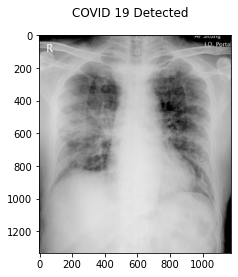

In [0]:
img_src = '/content/all/test/covid/ryct.2020200034.fig5-day4.jpeg'
img = cv2.imread(img_src)

img_pred = image.load_img(img_src, target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID 19 Detected"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=12)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

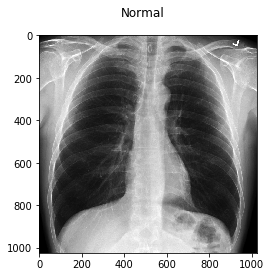

In [0]:
img_src = '/home/aydinnyunus/Desktop/test.jpg'
img = cv2.imread(img_src)

img_pred = image.load_img('/home/aydinnyunus/Desktop/test.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"
target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=12)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

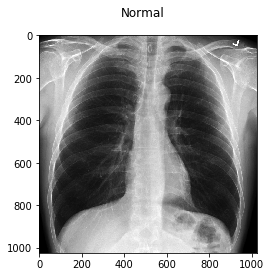

In [0]:
img_src = '/home/aydinnyunus/Desktop/normal.jpg'
img = cv2.imread(img_src)

img_pred = image.load_img('/home/aydinnyunus/Desktop/normal.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"
target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=12)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)